In [1]:
from reservoir import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load sample data

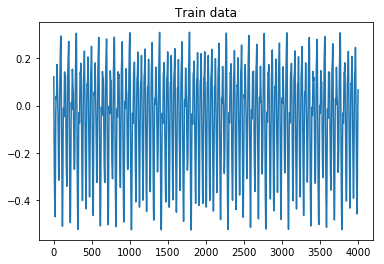

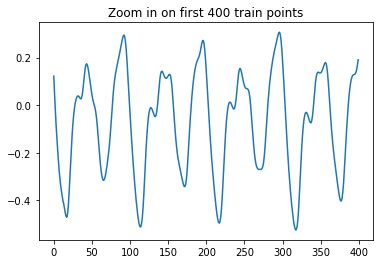

In [2]:
data = np.loadtxt('../eaxmple_data/MackeyGlass_t17.txt')

train = data[:4000].reshape(-1, 1)
test = data[4000:6000].reshape(-1, 1)
plt.title("Train data")
plt.plot(train)
plt.show()
plt.title("Zoom in on first 400 train points")
plt.plot(train[:400])
plt.show()

### Add noise

Standard deviation of noise is: 0.108095284028


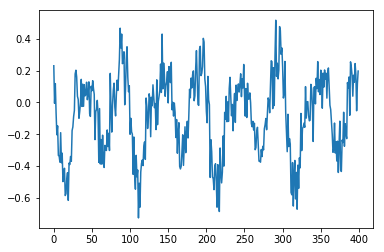

In [3]:
# Define noisy data for Bayesian Optimization
snr = 4
noise_std = np.sqrt(train.std(ddof=1)**2 / snr)

print('Standard deviation of noise is:', noise_std)
noisy_train = train + np.random.normal(0, noise_std, size=train.shape)
noisy_test = test + np.random.normal(0, noise_std, size=test.shape)
plt.plot(noisy_train[:400])
plt.show()

### Set bounds

In [5]:
bounds = [
    {'name': 'input_scaling', 'type': 'continuous', 'domain': (0, 1)},
    {'name': 'feedback_scaling', 'type': 'continuous', 'domain': (0, 1)},
    {'name': 'leaking_rate', 'type': 'continuous', 'domain': (0, 1)}, 
    {'name': 'spectral_radius', 'type': 'continuous', 'domain': (0, 1.25)},
    {'name': 'regularization', 'type': 'continuous', 'domain': (-12, 1)},
    {'name': 'connectivity', 'type': 'continuous', 'domain': (-3, 0)},
    {'name': 'n_nodes', 'type': 'continuous', 'domain': (100, 1500)}
]

### Optimize

In [6]:
# Set optimization parameters
esn_cv = EchoStateNetworkCV(bounds=bounds,
                            initial_samples=30,
                            subsequence_length=1000,
                            eps=1e-3,
                            cv_samples=1, 
                            max_iterations=100, 
                            scoring_method='tanh',
                            verbose=True)

In [ ]:
# Optimize (this may take a while!)
best_arguments = esn_cv.optimize(y=noisy_train)

In [ ]:
# Build best model
esn = EchoStateNetwork(**best_arguments)
esn.train(y=train)
score = esn.test(y=test, scoring_method='nrmse')

### Inspect performance

In [ ]:
# Diagnostic plots
plt.plot(esn.predict(100), label='Predicted')
plt.plot(test[:100], label='Ground truth')
plt.title('Prediction on next 100 steps')
plt.legend()
plt.show()